Churn Assignment Part B - Data Visualisation

In [1]:
import pandas as pd
import plotly.express as pe
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
df = pd.read_csv('churn_data.csv')


In [2]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0



You are tasked with doing some exploratory data analysis, which is the first step in building a model to predict churn. Churn is defined as a customer ceasing to use a service. Since the process of exploring data is usually very long, we will look at a subset of the total plots you would need to complete this.

1. First you should look at the differences in churn rates, split by the different categorical variables. Produce the appropriate visualisation to compare the **average churn rate**, split by:

In [3]:
# i. Geography
df_g=df.groupby("Geography").Exited.mean().reset_index()
fig11=pe.bar(df_g ,x='Geography', y='Exited', title= "Average Churn Rate Split by Geography")
fig11.update_layout( font_size=18)
fig11.update_yaxes(title_text="Churn Percentile")

In [4]:
# ii. Gender
df_ge=df.groupby("Gender").Exited.mean().reset_index()
fig12=pe.bar(df_ge ,x='Gender', y='Exited', title= "Average Churn Rate Split by Gender")
fig12.update_layout( font_size=18)
fig12.update_yaxes(title_text="Churn Percentile")

In [5]:
# iii. Tenure
df_t=df.groupby("Tenure").Exited.mean().reset_index()
fig13=pe.bar(df_t ,x='Tenure', y='Exited', title= "Average Churn Rate Split by Tenure")
fig13.update_layout( font_size=18)
fig13.update_yaxes(title_text="Churn Percentile")

For maximum marks, make sure plots are correctly labelled.

2. We would also like to know how the data is distributed. Some models require features to be 
normally distributed, and highly skewed variables can affect summary statistics if left 
unchecked. Produce the appropriate visualisation for the distribution of:

In [6]:
# i. Geography
#the below histogram shows normal distributation of data
fig21=pe.histogram(df["Geography"], title="Histogram for distribution of Geogarphy")
fig21.update_xaxes(title_text="Geogarphy")
fig21.show()
#fig21_2.show()



In [7]:
# ii. Age
#the below histogram shows normal distributation of data as it does not have a long tail
fig22=pe.histogram(df["Age"], title= "Histogram for distribution of Age")
fig22_2=pe.box(df["Age"], title= "Box plot for Age Distributation")
fig22.update_xaxes(title_text="Age")
fig22.show()
fig22_2.show()

In [8]:
# iii. Credit Score
# the below histogram shows a long tail of data which indicated that the data is not normaly distributed
fig23=pe.histogram(df["CreditScore"], title="Histogram for distributation of Credit Score")
fig23_2=pe.box(df["CreditScore"], title ="Box Plot for distributation of Credit Score")
fig23.update_xaxes(title_text="Credit Score")
fig23.show()
fig23_2.show()

In [9]:
pe.scatter(df,x="CreditScore",y="Exited",trendline="ols").show()

3: Combine all of the above visualisations into a subplot (hint: Subplot takes figures created in graph objects, so you may need to recreate some visualisations). For maximum marks, make sure that you correctly label each figure in the subplot.

In [10]:
fig3=make_subplots(rows=3, cols=2 ,
subplot_titles = ['Average Churn Rate Split by Geography',"Histogram for distributation of  Geography"
                    , 'Average Churn Rate Split by Gender',"Histogram for distributation of Age" 
                    ,'Average Churn Rate Split by Tenure',"Histogram for distributation of Credit Score"])
fig11_trace=fig11.data[0]
fig12_trace=fig12.data[0]
fig13_trace=fig13.data[0]
fig21_trace=fig21.data[0]
fig22_trace=fig22.data[0]
fig23_trace=fig23.data[0]

fig3.add_trace(fig11_trace, row=1, col=1)
fig3.add_trace(fig12_trace, row=2, col=1)
fig3.add_trace(fig13_trace, row=3, col=1)
fig3.add_trace(fig21_trace, row=1, col=2)
fig3.add_trace(fig22_trace, row=2, col=2)
fig3.add_trace(fig23_trace, row=3, col=2)


fig3.show()


4: We now want to see how each variable is correlated with the target. Create a correlation matrix which shows how each variable is correlated with each other variable using df.corr(). Then, select the column related to our target (the exited column). Create a bar chart to visualise the correlation between each feature and the target.

In [11]:
corr_matrix = df.corr()
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [12]:
target_col=corr_matrix["Exited"]
target_col

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [13]:

fig4=pe.bar(target_col,title="Correlation between each feature and the target")
fig4.show()

4.1. Order the bars so that the feature with the highest correlation is the first bar.

In [14]:
Decending_target=target_col.sort_values(ascending=False)
Decending_target

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [15]:
Decending_target.dtypes

dtype('float64')

In [16]:
fig41 =pe.bar(Decending_target,title="Correlation between each feature and the target")
fig41.show()

4.2. Add the correlation value to the top of each bar

In [17]:
fig42 = go.Figure()
fig41_trace = fig41.data[0]
fig42.add_trace(go.Bar(fig41_trace, text=Decending_target.round(4)))
fig42.update_layout(title_text="Correlation between each feature and the target", title_font_size=24)
fig42.show()

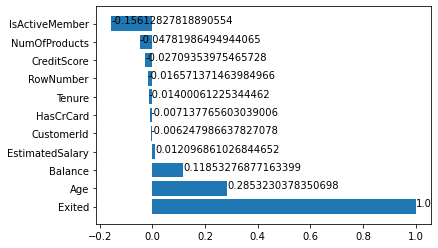

In [18]:
#Another way to do it
x = ["Exited","Age","Balance","EstimatedSalary","CustomerId","HasCrCard",
    "Tenure","RowNumber","CreditScore","NumOfProducts" ,"IsActiveMember" ]
y = Decending_target

plt.barh(x,y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

4.3. Add a line to the figure which shows the average correlation (hint: This will require adding an extra trace).

In [19]:
avg=Decending_target.mean()
avg

0.10372302261656813

In [20]:
fig42.add_annotation(x=5, y=avg, text=f'The mean correlation of all features with Excited is {round(avg, 4)}')
fig42.add_shape(type='line',
                x0=0,
                y0=avg,
                x1=10,
                y1=avg,
                line=dict(color='Red'),
                xref="x",
                yref='y'
)
fig42.show()

Please save this notebook as a PDF containing your finished plots and submit them on the website by 24th November.

To save as a PDF, click on the '...' symbol on the same bar as '+ Markdown' and 'Run All' and click 'Export', then 'pdf'.